In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\rajku\Documents\OneDrive\Desktop\MSc Data Analytics\Trimester-4\Machine Learning\Labs\Lab7\insurance.csv",  encoding = "latin")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [5]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


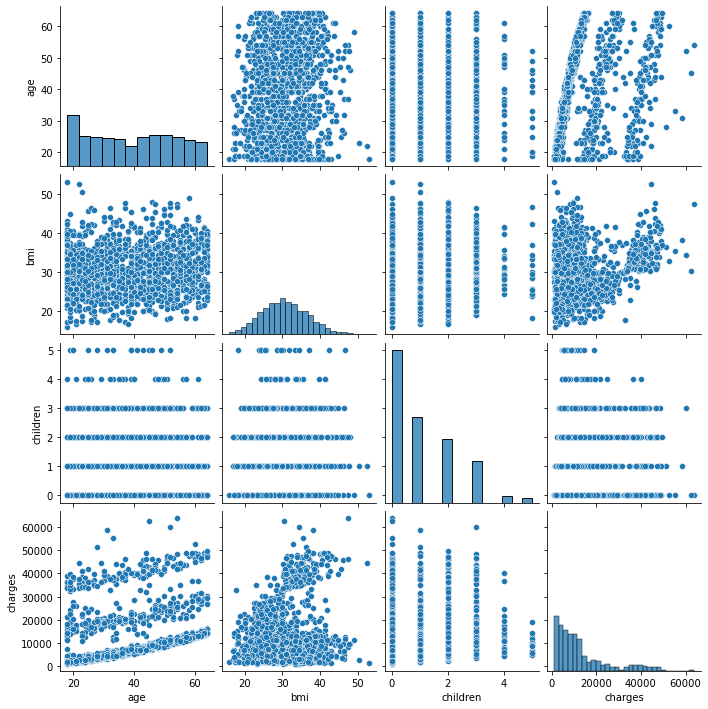

In [8]:
# Pair plot between features
sns.pairplot(df)

C:\Users\rajku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


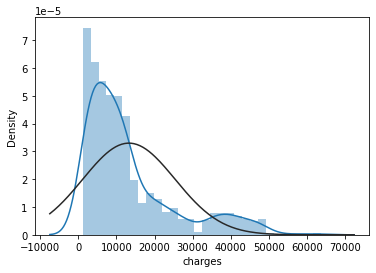

<Figure size 432x288 with 0 Axes>

In [9]:
sns.distplot(df["charges"],fit=norm)
fig = plt.figure()

C:\Users\rajku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


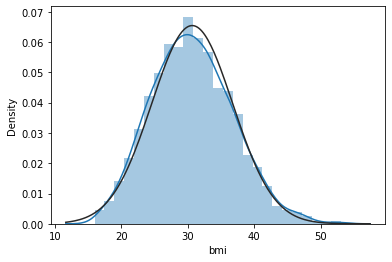

<Figure size 432x288 with 0 Axes>

In [10]:
sns.distplot(df["bmi"],fit=norm)
fig = plt.figure()

C:\Users\rajku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


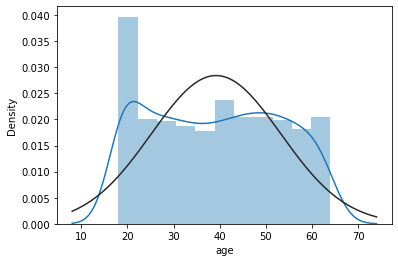

<Figure size 432x288 with 0 Axes>

In [11]:
sns.distplot(df["age"],fit=norm)
fig = plt.figure()

C:\Users\rajku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


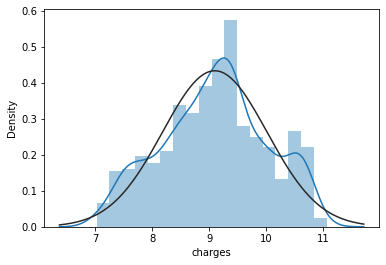

<Figure size 432x288 with 0 Axes>

In [12]:
# From the above distribution plots and the description of the numerical features
# we can conclude that variable "charges" does not possess normal distribution of data
# We apply log transform to normalise it.
# Variable 'age' almost possess normal distribution
df["charges"]=np.log(df['charges'])
sns.distplot(df["charges"],fit=norm)
fig = plt.figure()

In [13]:
# As we can see from the figures above, the log transformation has improved distribution
# which will help us to achieve better performances of our predictions.

<AxesSubplot:>

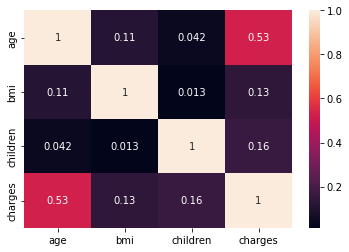

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
# From the above heat map we can conclude:
# Older the age, higher is the charge for medical insurance.

In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
sex_dummy = pd.get_dummies(df['sex'])
smoker_dummy = pd.get_dummies(df['smoker'])
region_dummy = pd.get_dummies(df['region'])
df = pd.concat([df,sex_dummy,smoker_dummy,region_dummy], axis=1)
df.rename(columns={'no': 'non-smoker', 'yes': 'nicotian'}, inplace=True)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male,non-smoker,nicotian,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,9.734176,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,7.453302,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,8.400538,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,9.998092,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,8.260197,0,1,1,0,0,1,0,0


In [19]:
df = df.drop(['sex','smoker','region'], axis=1)

In [20]:
df.head(10)

,age,bmi,children,charges,female,male,non-smoker,nicotian,northeast,northwest,southeast,southwest
0,19,27.900,0,9.734176,1,0,0,1,0,0,0,1
1,18,33.770,1,7.453302,0,1,1,0,0,0,1,0
2,28,33.000,3,8.400538,0,1,1,0,0,0,1,0
3,33,22.705,0,9.998092,0,1,1,0,0,1,0,0
4,32,28.880,0,8.260197,0,1,1,0,0,1,0,0
5,31,25.740,0,8.231275,1,0,1,0,0,0,1,0
6,46,33.440,1,9.016827,1,0,1,0,0,0,1,0
7,37,27.740,3,8.893093,1,0,1,0,0,1,0,0
8,37,29.830,2,8.765054,0,1,1,0,1,0,0,0
9,60,25.840,0,10.272397,1,0,1,0,0,1,0,0


In [21]:
x = df.iloc[0:,0:12]
x['13'] = 1
x
x = np.array(x)
x

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  1.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  1.  ,  0.  ,  1.  ],
       [28.  , 33.  ,  3.  , ...,  1.  ,  0.  ,  1.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  1.  ,  0.  ,  1.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  1.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [22]:
y = df['charges']
y = np.array(y)
y

array([ 9.73417643,  7.45330245,  8.40053847, ...,  7.39623314,
        7.60486709, 10.27991376])

In [23]:
#Cost Function
def cost(df,params):
    total_cost = 0
    for i in range(1338):
        total_cost += (1/1338)*((df[i]*params).sum() - y[i])**2
    return total_cost

def gd(df,params,lrate,iter_value):
    for i in range(iter_value):
        slopes = np.zeros(13)
        for j in range(1338):
            for k in range(13):
                slopes[k] += (1/1338)*((df[i]*params).sum() - y[j])*df[j][k]
        params = params - lrate * slopes
        print(cost(df,params))
    return params


#Running the Gradient Descent
params = np.zeros(13)
lrate = 0.01
iter_value = 100
params = gd(x,params,lrate,iter_value)
print(params)

54678.78849724178
15278020.361783504
6696918954.958314
2634729463443.17
1181794058760576.2
4.643168112171856e+17
3.678318752868103e+20
1.9255715677156176e+23
1.0632446290395894e+26
1.0488252834621423e+29
3.243942593077255e+31
3.3886815275247374e+34
1.2589295701517707e+37
1.4586765381712536e+40
8.04695371649775e+42
1.7418886618682768e+45
1.5372388068494574e+48
3.966242143597526e+50
4.634208759320348e+53
2.35911445203958e+56
2.800350642725501e+59
1.2934167670378088e+62
3.8172857105464204e+64
2.0382257672966808e+67
1.0727835717128957e+70
1.068470637747786e+73
1.0720645058223703e+76
1.0649477543724685e+79
2.1190894881326326e+81
1.1492073114779113e+84
4.376476703186937e+86
9.653502523807881e+88
2.49241711750332e+91
2.7594678149423872e+94
1.354654737913826e+97
2.436223975102221e+99
2.8751027854964407e+102
7.640392390540435e+104
4.7602948243013804e+107
6.087190959779755e+110
1.8263305012557545e+113
9.836593165577978e+115
5.0177478940790025e+118
2.84096856952214e+121
1.933601926990662e+124
2.0